In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, learning_curve
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [20]:
# Set visualization style
plt.style.use('ggplot')
sns.set_palette('viridis')

Task 1: Data Preprocessing and Exploratory Data Analysis

In [21]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [22]:
# Display the first few rows of the dataset
df.head()

,#,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df.describe()

,#,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


2. Data Cleaning and Preprocessing

In [24]:
# Check dataset information
print(f"Dataset shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)

print("\nChecking for missing values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Print column names to verify
print("\nColumns in dataset:")
print(df.columns.tolist())

# Drop unnecessary columns (correct column names)
df = df.drop(['#', 'CustomerId', 'Surname'], axis=1)

Dataset shape: (10000, 14)

Data Types:
#                    int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Checking for missing values:
#                  0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Duplicate rows: 0

Descriptive Statistics:
                 #    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+0

3.1 Target Variable Distribution


Churn rate: 20.37%
Retention rate: 79.63%


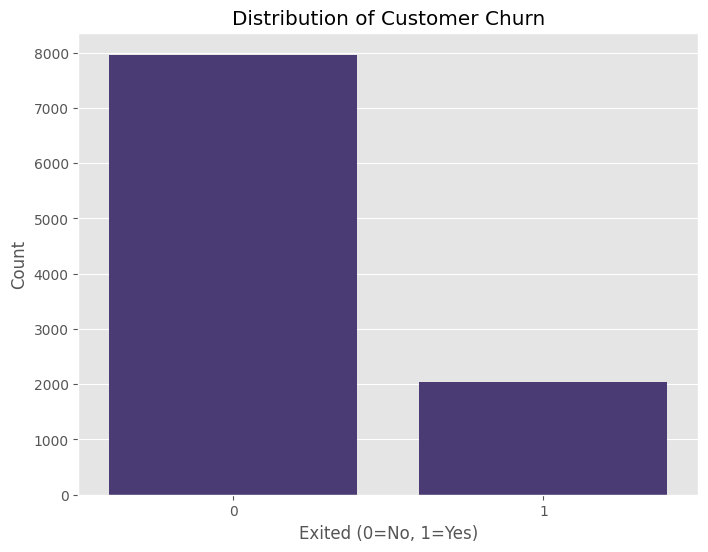

In [25]:
# Distribution of target variable (Exited)
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Count')

# Calculate percentages
churn_percentage = df['Exited'].value_counts(normalize=True) * 100
print(f"\nChurn rate: {churn_percentage[1]:.2f}%")
print(f"Retention rate: {churn_percentage[0]:.2f}%")
plt.show()

3.2 Numerical Features Analysis


Summary Statistics for Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000  


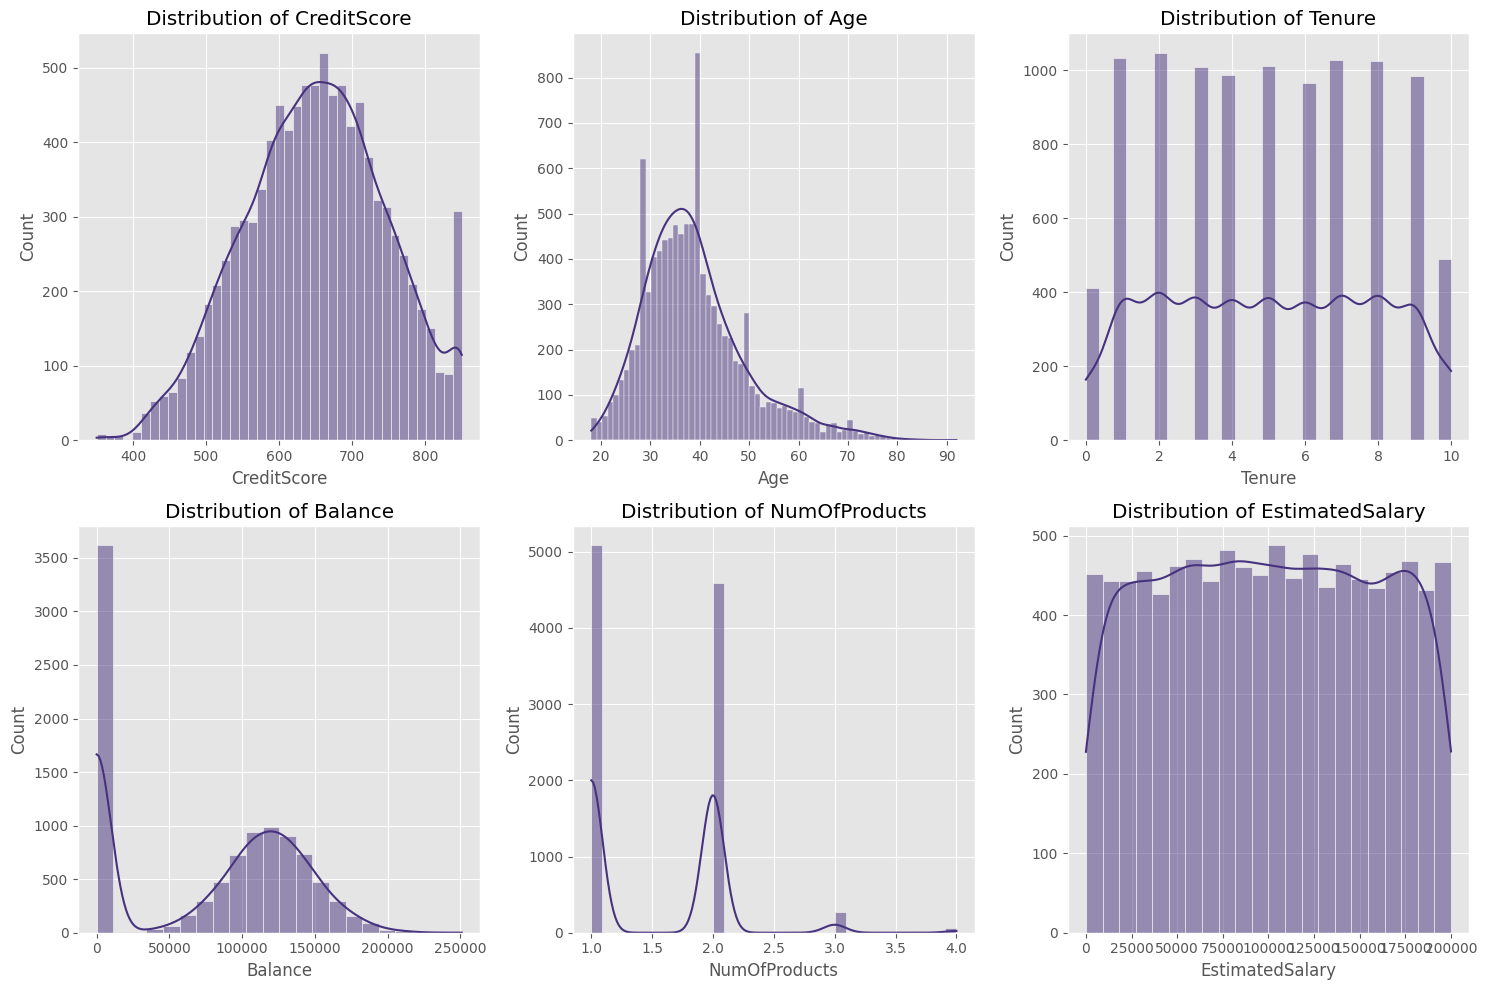

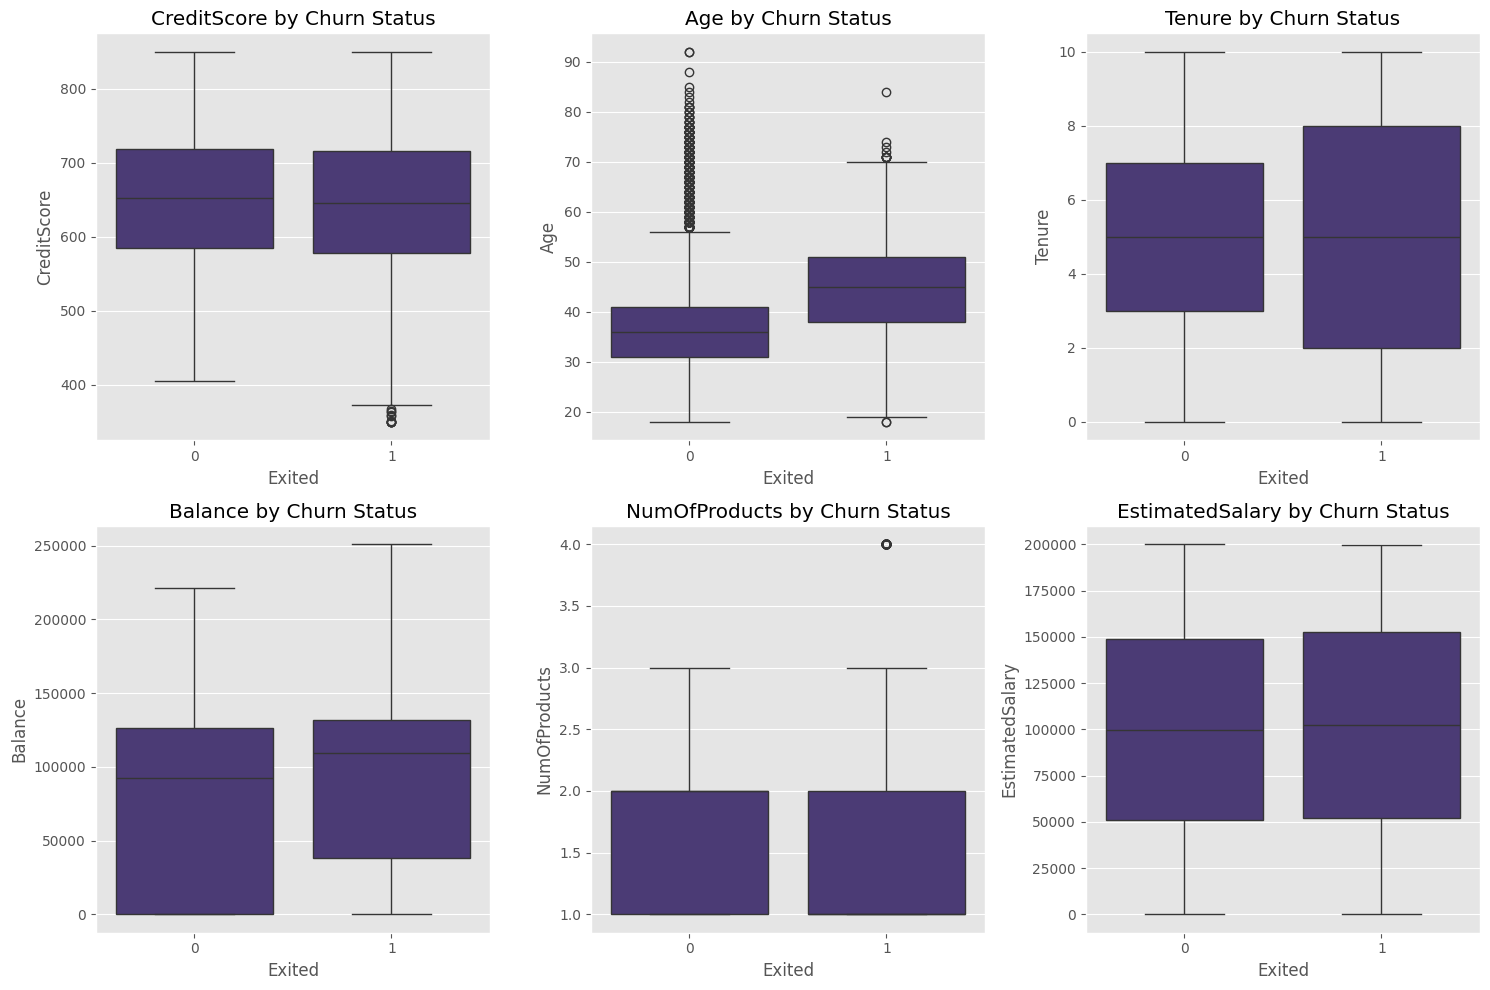

In [26]:
# Distribution and summary of numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Summary statistics
print("\nSummary Statistics for Numerical Features:")
print(df[num_features].describe())

# Distribution plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} by Churn Status')
plt.tight_layout()
plt.show()

3.3 Categorical Features Analysis

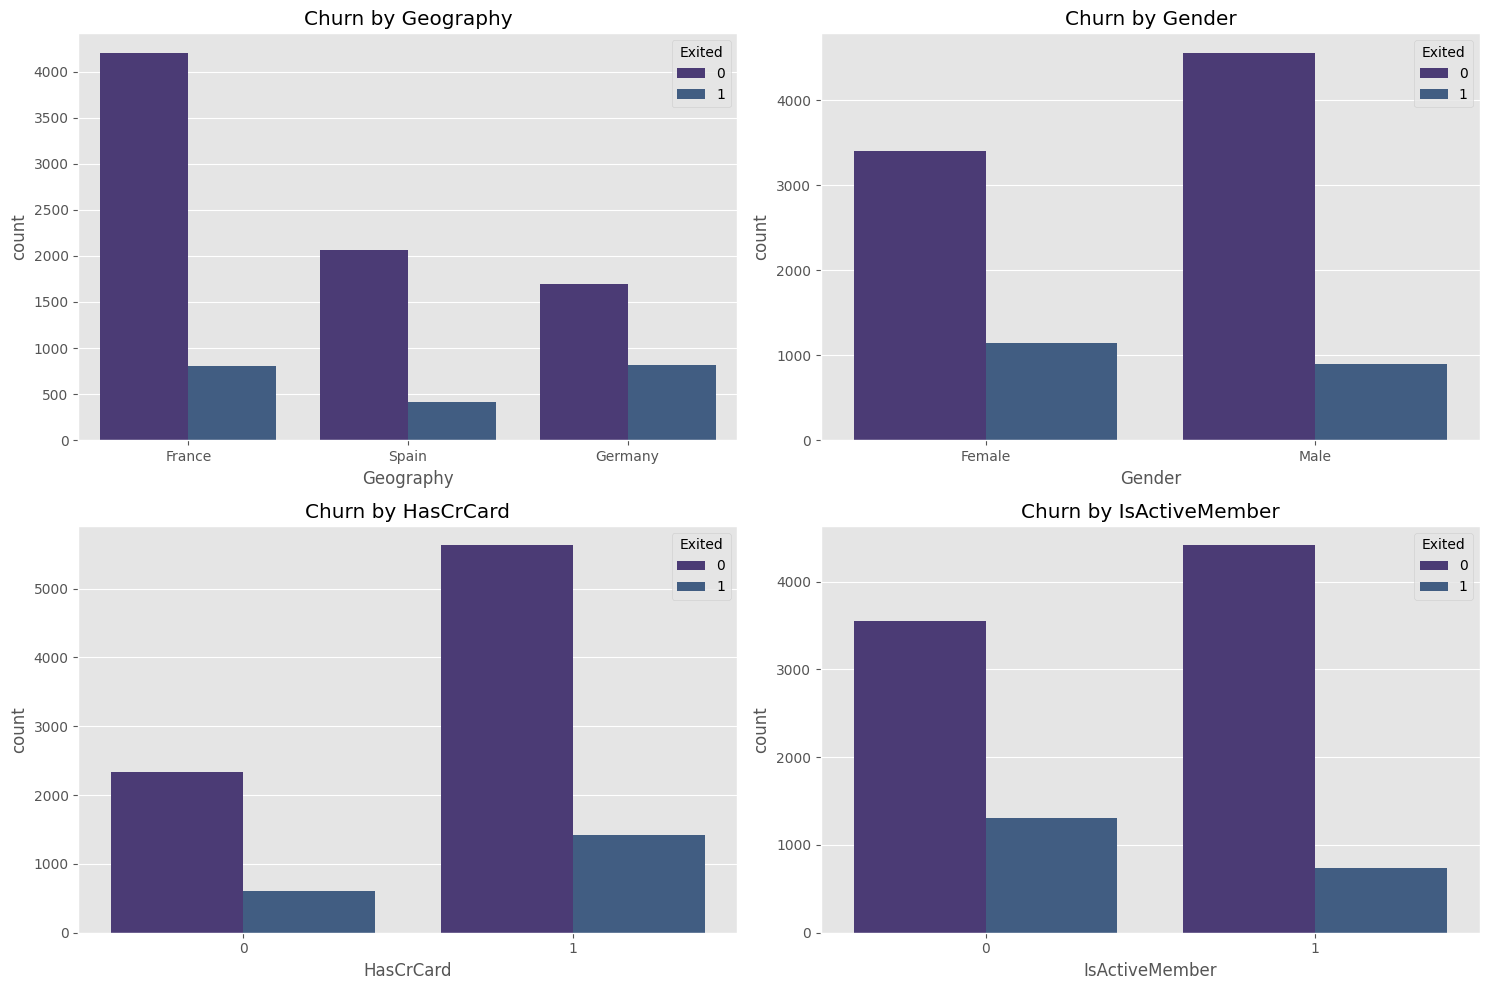


Distribution of Geography:
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

Churn rate by Geography:
Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

Distribution of Gender:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

Churn rate by Gender:
Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

Distribution of HasCrCard:
HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64

Churn rate by HasCrCard:
HasCrCard
0    20.814941
1    20.184266
Name: Exited, dtype: float64

Distribution of IsActiveMember:
IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64

Churn rate by IsActiveMember:
IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64


In [27]:
# Distribution of categorical features
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'Churn by {feature}')
plt.tight_layout()
plt.show()

# Calculate percentages for each category
for feature in cat_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts(normalize=True) * 100)
    
    print(f"\nChurn rate by {feature}:")
    churn_by_category = df.groupby(feature)['Exited'].mean() * 100
    print(churn_by_category)

3.4 Correlation Analysis

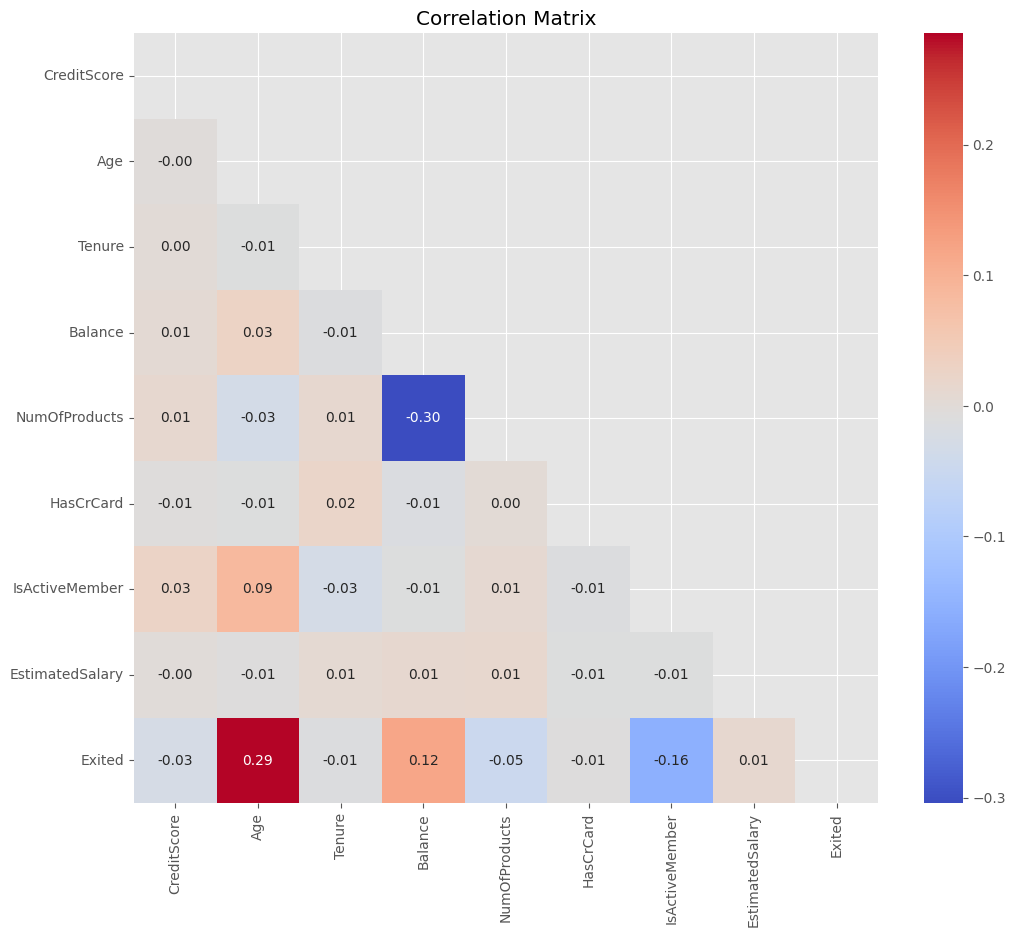


Correlation with Target Variable (Exited):
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [28]:
# Correlation analysis - use only numerical columns
# Get only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

# Feature correlation with target
corr_with_target = correlation_matrix['Exited'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (Exited):")
print(corr_with_target)

3.5 Age Analysis

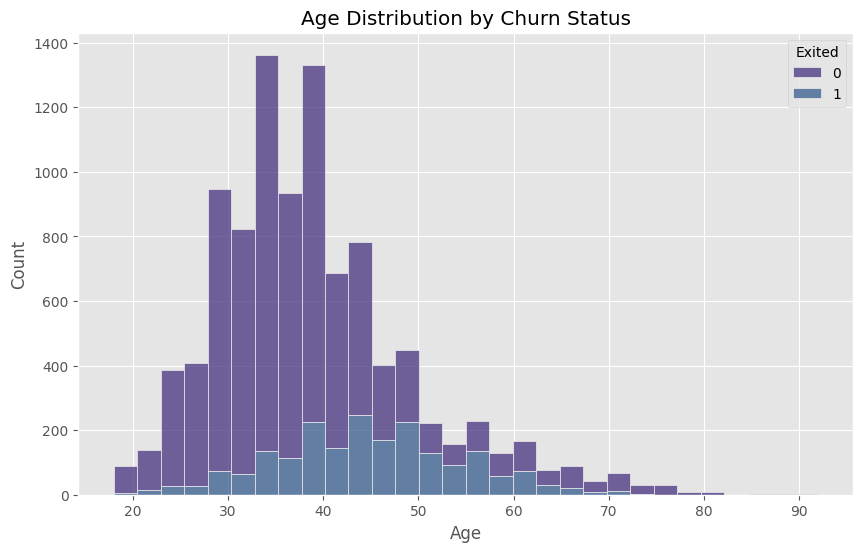

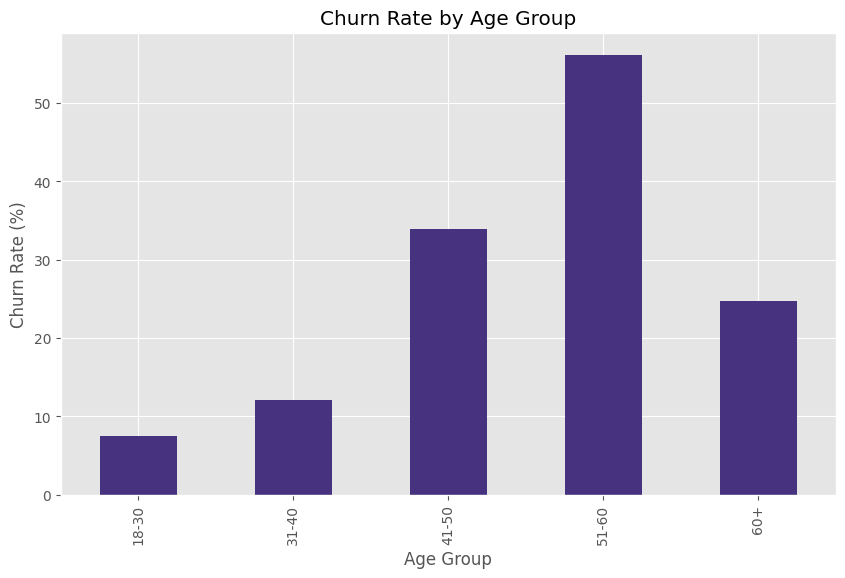

In [29]:
# Age distribution by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Age groups and churn rate
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], 
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(10, 6))
age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100
age_churn.plot(kind='bar')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.show()

3.6 Balance Analysis

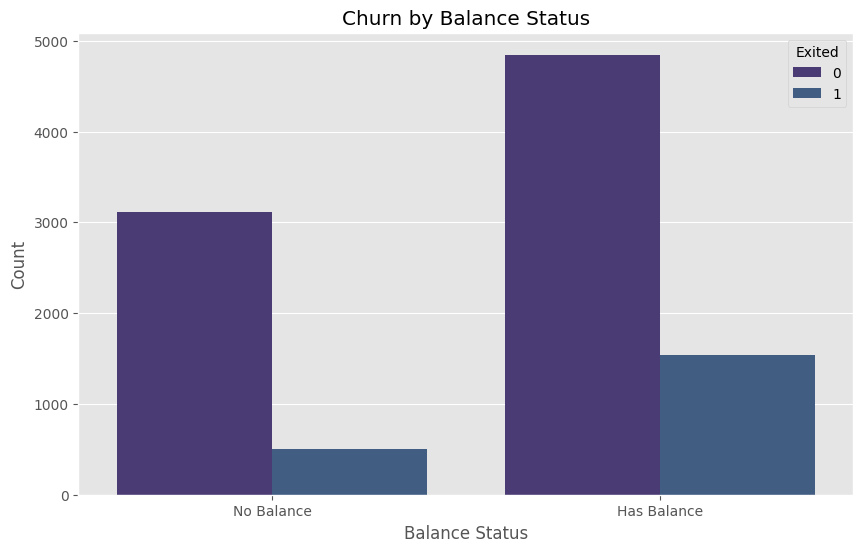


Churn rate by Balance Status:
HasBalance
Has Balance    24.079586
No Balance     13.823611
Name: Exited, dtype: float64


In [30]:
# Create a balance category (Zero/Non-Zero)
df['HasBalance'] = df['Balance'].apply(lambda x: 'No Balance' if x == 0 else 'Has Balance')

plt.figure(figsize=(10, 6))
sns.countplot(x='HasBalance', hue='Exited', data=df)
plt.title('Churn by Balance Status')
plt.xlabel('Balance Status')
plt.ylabel('Count')
plt.show()

# Churn rate by balance status
balance_churn = df.groupby('HasBalance')['Exited'].mean() * 100
print("\nChurn rate by Balance Status:")
print(balance_churn)

TASK 2: Model Training and Evaluation

1. Data Preparation

In [31]:
# Remove the features created during EDA that we don't want to use in modeling
df_model = df.drop(['HasBalance', 'AgeGroup'], axis=1)

# Identify categorical and numerical features
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                      'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data using stratification to maintain class balance
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in testing set: {np.bincount(y_test)}")

Training set: 8000 samples
Testing set: 2000 samples
Class distribution in training set: [6370 1630]
Class distribution in testing set: [1593  407]


2. Model Training

Creating function for cross-validation and to plot learning curves

In [32]:
# Create a function for cross-validation assessment
def perform_cross_validation(model, X, y, cv=5):
    # Define metrics to evaluate
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'auc': 'roc_auc'
    }
    
    # Perform cross-validation
    results = {}
    for metric_name, scoring_method in scoring.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring_method)
        results[metric_name] = {
            'mean': scores.mean(),
            'std': scores.std(),
            'scores': scores
        }
    
    return results

# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y, title, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='orange')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-validation score')
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Training examples', fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    return plt

# Extended evaluation function with visualizations and time tracking
def evaluate_model(model, X_test, y_test, model_name, feature_names=None):
    # Time prediction performance
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Probability predictions for ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    
    # Print key metrics
    print(f"\n=== {model_name} Evaluation ===")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"AUC:       {auc:.4f}")
    print(f"Prediction time: {prediction_time:.4f} seconds")
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    
    # Add labels for business context
    plt.text(-0.4, -0.3, f"True Negative (Stay): {cm[0][0]}", fontsize=11)
    plt.text(0.8, -0.3, f"False Positive (False Alarm): {cm[0][1]}", fontsize=11)
    plt.text(-0.4, 2.3, f"False Negative (Missed Churn): {cm[1][0]}", fontsize=11)
    plt.text(0.8, 2.3, f"True Positive (Churn): {cm[1][1]}", fontsize=11)
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Return the metrics
    evaluation_results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'confusion_matrix': cm,
        'prediction_time': prediction_time,
        'y_pred': y_pred,
        'y_prob': y_prob
    }
    
    return evaluation_results

MODEL 1: LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING


========== LOGISTIC REGRESSION ==========
Performing hyperparameter tuning for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters: {'classifier__C': 1.0, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.3102

Performing cross-validation on best Logistic Regression model...

Cross-validation results:
accuracy: 0.8100 (±0.0021)
precision: 0.5934 (±0.0157)
recall: 0.2153 (±0.0088)
f1: 0.3158 (±0.0095)
auc: 0.7633 (±0.0115)


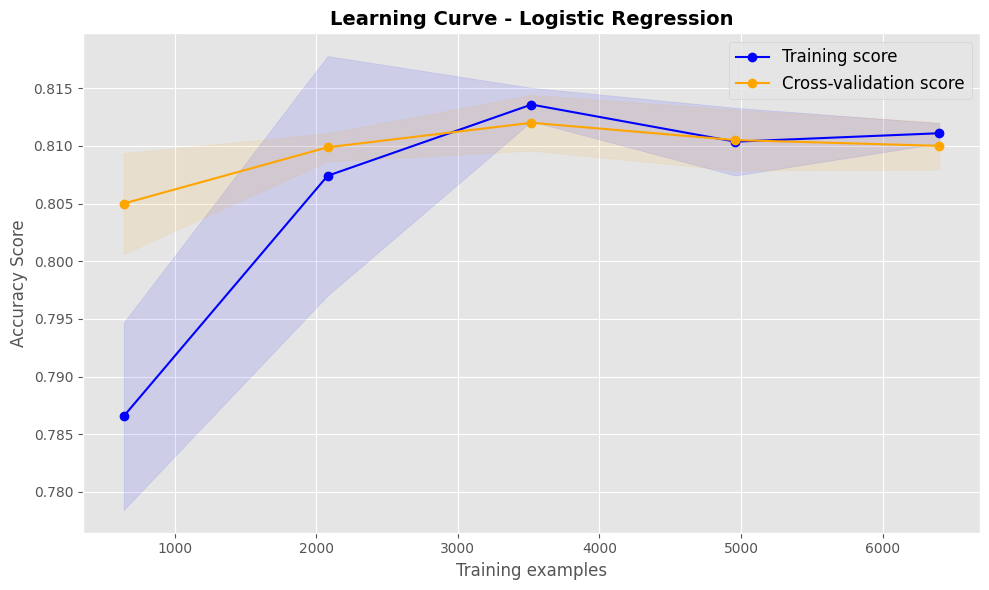


=== Logistic Regression Evaluation ===
Accuracy:  0.8085
Precision: 0.5938
Recall:    0.1867
F1 Score:  0.2841
AUC:       0.7749
Prediction time: 0.0142 seconds


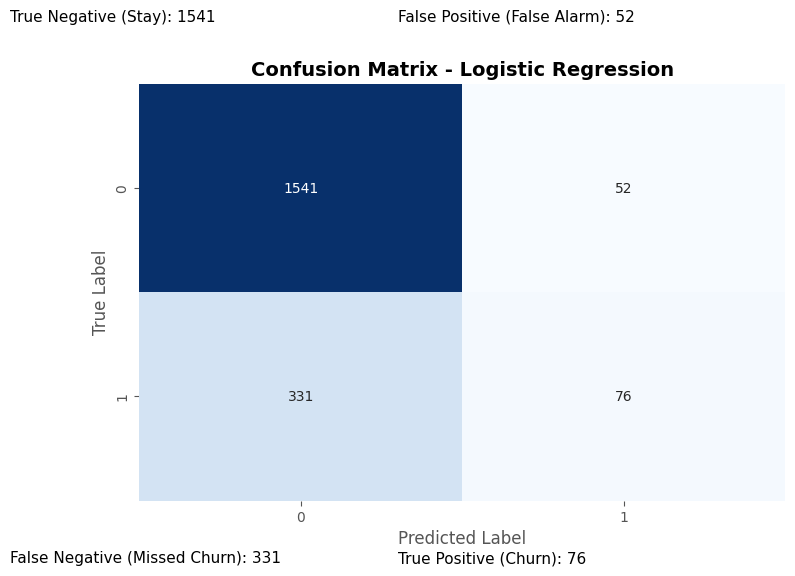


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [33]:
print("\n========== LOGISTIC REGRESSION ==========")
# Create the base pipeline
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define hyperparameter grid
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [1000]
}

# Set up CV with stratification due to imbalanced classes
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search
print("Performing hyperparameter tuning for Logistic Regression...")
lr_grid = GridSearchCV(lr_pipe, lr_param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
lr_grid.fit(X_train, y_train)

# Best model and parameters
print(f"\nBest parameters: {lr_grid.best_params_}")
print(f"Best cross-validation score: {lr_grid.best_score_:.4f}")

# Extract best model
lr_best = lr_grid.best_estimator_

# Perform cross-validation on the best model
print("\nPerforming cross-validation on best Logistic Regression model...")
lr_cv_results = perform_cross_validation(lr_best, X_train, y_train)

# Print cross-validation results
print("\nCross-validation results:")
for metric, results in lr_cv_results.items():
    print(f"{metric}: {results['mean']:.4f} (±{results['std']:.4f})")

# Plot learning curve
plot_learning_curve(lr_best, X_train, y_train, 
                   "Learning Curve - Logistic Regression")
plt.show()

# Evaluate on test set
lr_results = evaluate_model(lr_best, X_test, y_test, "Logistic Regression")

MODEL 2: DECISION TREE WITH HYPERPARAMETER TUNING


========== DECISION TREE ==========
Performing hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.5475

Performing cross-validation on best Decision Tree model...

Cross-validation results:
accuracy: 0.8391 (±0.0121)
precision: 0.6411 (±0.0399)
recall: 0.4773 (±0.0444)
f1: 0.5466 (±0.0407)
auc: 0.7899 (±0.0201)


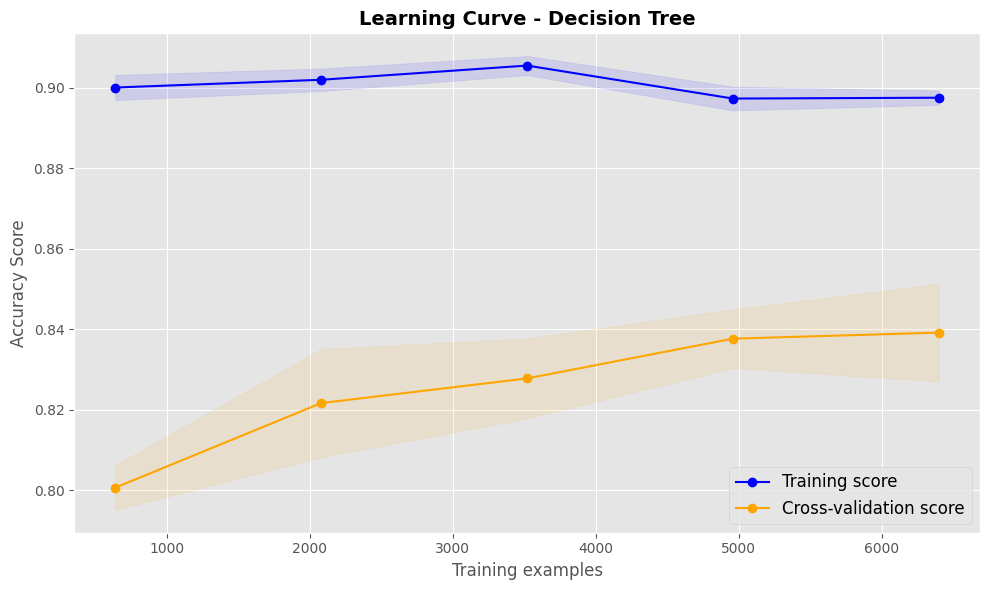


=== Decision Tree Evaluation ===
Accuracy:  0.8320
Precision: 0.6156
Recall:    0.4644
F1 Score:  0.5294
AUC:       0.7922
Prediction time: 0.0145 seconds


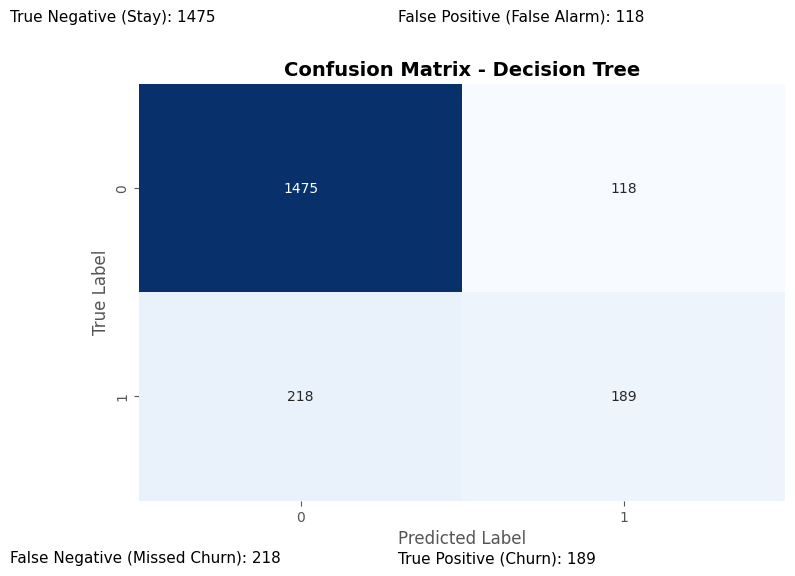


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.62      0.46      0.53       407

    accuracy                           0.83      2000
   macro avg       0.74      0.70      0.71      2000
weighted avg       0.82      0.83      0.82      2000



In [34]:
print("\n========== DECISION TREE ==========")
# Create the base pipeline
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid
dt_param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Perform grid search
print("Performing hyperparameter tuning for Decision Tree...")
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)

# Best model and parameters
print(f"\nBest parameters: {dt_grid.best_params_}")
print(f"Best cross-validation score: {dt_grid.best_score_:.4f}")

# Extract best model
dt_best = dt_grid.best_estimator_

# Perform cross-validation on the best model
print("\nPerforming cross-validation on best Decision Tree model...")
dt_cv_results = perform_cross_validation(dt_best, X_train, y_train)

# Print cross-validation results
print("\nCross-validation results:")
for metric, results in dt_cv_results.items():
    print(f"{metric}: {results['mean']:.4f} (±{results['std']:.4f})")

# Plot learning curve
plot_learning_curve(dt_best, X_train, y_train,
                   "Learning Curve - Decision Tree")
plt.show()

# Evaluate on test set
dt_results = evaluate_model(dt_best, X_test, y_test, "Decision Tree")

3. Model Comparison Visualization

<Figure size 1400x800 with 0 Axes>

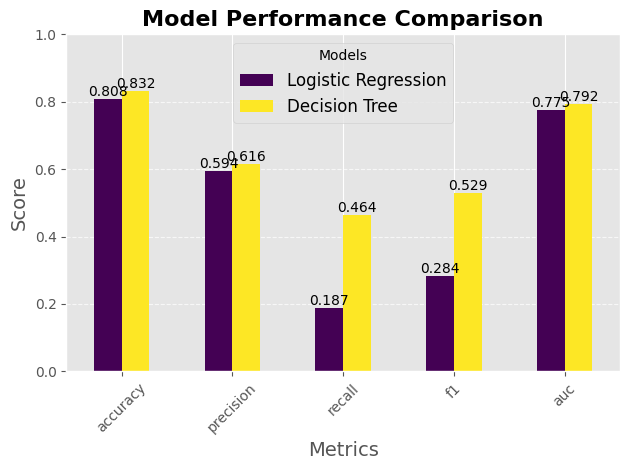

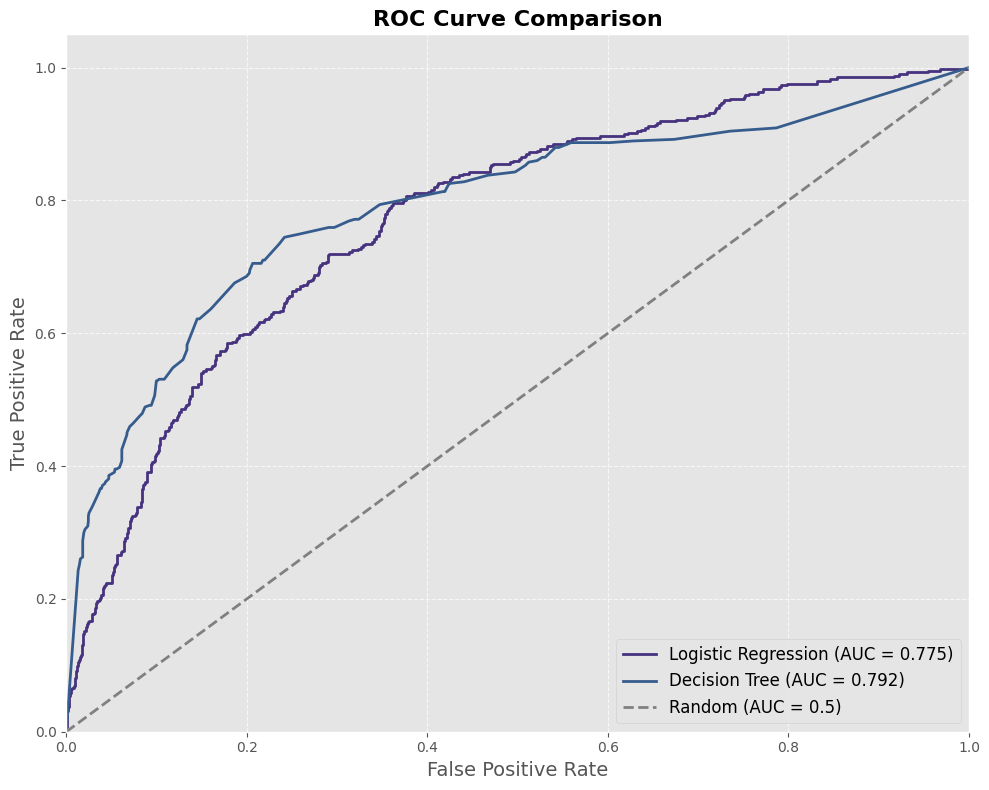


=== MODEL PERFORMANCE COMPARISON ===

Performance Metrics:
                 Logistic Regression  Decision Tree
accuracy                    0.808500       0.832000
precision                   0.593750       0.615635
recall                      0.186732       0.464373
f1                          0.284112       0.529412
auc                         0.774853       0.792161
prediction_time             0.014238       0.014492

Best model by metric:
- Best accuracy: Decision Tree (0.8320)
- Best precision: Decision Tree (0.6156)
- Best recall: Decision Tree (0.4644)
- Best f1: Decision Tree (0.5294)
- Best auc: Decision Tree (0.7922)
- Best prediction_time: Logistic Regression (0.0142 seconds)

Overall best model based on F1 score: Decision Tree (F1 = 0.5294)


In [35]:
# Create a comprehensive comparison of models
def compare_models(models_results, model_names):
    # Create DataFrame for comparison
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc', 'prediction_time']
    comparison_data = {}
    
    for i, model_name in enumerate(model_names):
        comparison_data[model_name] = [
            models_results[i]['accuracy'],
            models_results[i]['precision'],
            models_results[i]['recall'],
            models_results[i]['f1'],
            models_results[i]['auc'],
            models_results[i]['prediction_time']
        ]
    
    comparison_df = pd.DataFrame(comparison_data, index=metrics)
    
    # Bar chart for performance metrics
    plt.figure(figsize=(14, 8))
    performance_metrics = comparison_df.loc[['accuracy', 'precision', 'recall', 'f1', 'auc']]
    performance_metrics.plot(kind='bar', colormap='viridis')
    plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylim([0, 1])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Models', fontsize=12)
    
    # Add value labels on bars
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%.3f', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # ROC Curve comparison
    plt.figure(figsize=(10, 8))
    
    for i, model_name in enumerate(model_names):
        y_prob = models_results[i]['y_prob']
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = models_results[i]['auc']
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.3f})')
    
    # Add reference line for random classifier
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random (AUC = 0.5)')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve Comparison', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print detailed comparison
    print("\n=== MODEL PERFORMANCE COMPARISON ===")
    print("\nPerformance Metrics:")
    print(comparison_df)
    
    # Identify the best model for each metric
    best_model = {}
    for metric in metrics:
        if metric == 'prediction_time':
            best_idx = comparison_df.loc[metric].idxmin()  # Lower is better for time
            best_model[metric] = f"{best_idx} ({comparison_df.loc[metric, best_idx]:.4f} seconds)"
        else:
            best_idx = comparison_df.loc[metric].idxmax()  # Higher is better for metrics
            best_model[metric] = f"{best_idx} ({comparison_df.loc[metric, best_idx]:.4f})"
    
    print("\nBest model by metric:")
    for metric, model in best_model.items():
        print(f"- Best {metric}: {model}")
    
    # Determine overall best model based on F1 score (balanced metric)
    best_f1_model = comparison_df.loc['f1'].idxmax()
    best_f1_score = comparison_df.loc['f1', best_f1_model]
    print(f"\nOverall best model based on F1 score: {best_f1_model} (F1 = {best_f1_score:.4f})")
    
    return comparison_df

# Compare the models
model_names = ["Logistic Regression", "Decision Tree"]
model_results = [lr_results, dt_results]
comparison = compare_models(model_results, model_names)

4. Feature Importance Analysis

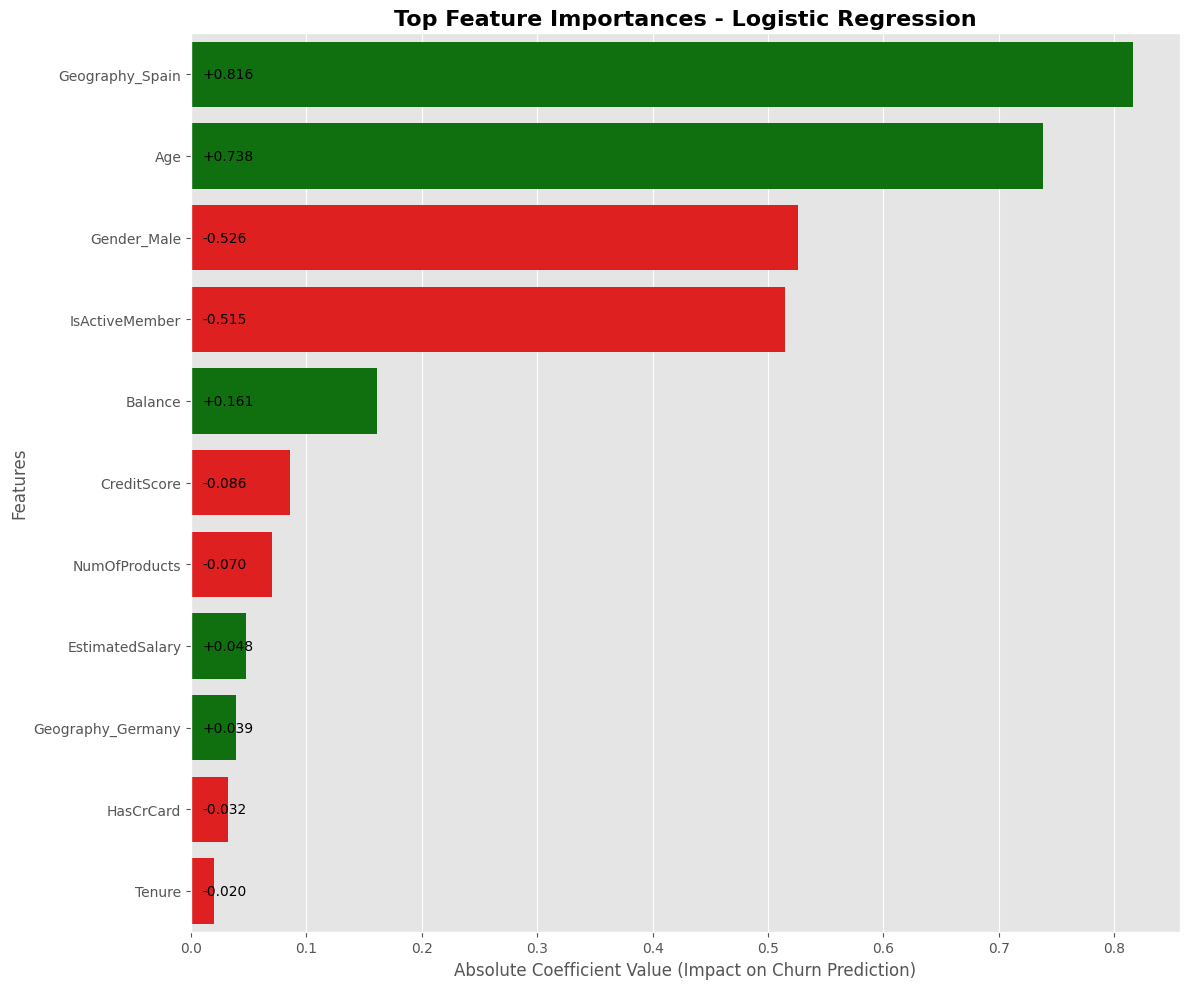


=== BUSINESS INSIGHTS FROM LOGISTIC REGRESSION ===

Key factors influencing customer churn:
- Geography_Spain: increases churn probability by 0.8162
  → Insight: Geographic location affects churn patterns. Tailor marketing strategies by region.
- Age: increases churn probability by 0.7383
  → Insight: Age is a crucial factor in churn prediction. Consider age-targeted retention strategies.
- Gender_Male: decreases churn probability by 0.5256
- IsActiveMember: decreases churn probability by 0.5148
  → Insight: Active membership status strongly impacts churn. Focus on increasing customer engagement.
- Balance: increases churn probability by 0.1614
  → Insight: Account balance influences customer retention. Consider incentives for maintaining balances.


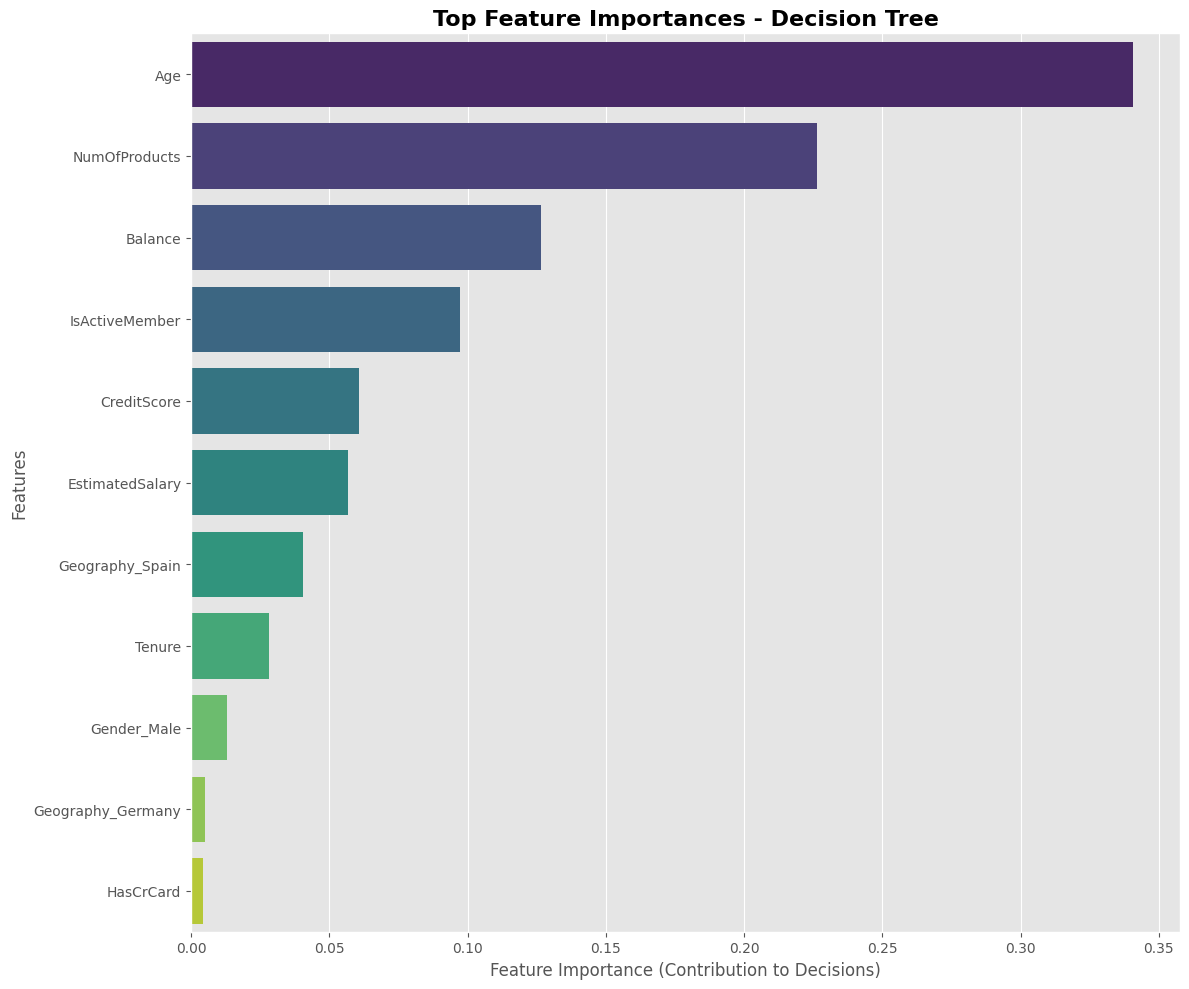


=== BUSINESS INSIGHTS FROM DECISION TREE ===

Key factors influencing customer churn:
- Age: contributes 0.3406 to churn decisions
  → Insight: Age is a crucial factor in churn prediction. Consider age-targeted retention strategies.
- NumOfProducts: contributes 0.2264 to churn decisions
  → Insight: Number of products owned impacts loyalty. Cross-selling may reduce churn risk.
- Balance: contributes 0.1267 to churn decisions
  → Insight: Account balance influences customer retention. Consider incentives for maintaining balances.
- IsActiveMember: contributes 0.0973 to churn decisions
  → Insight: Active membership status strongly impacts churn. Focus on increasing customer engagement.
- CreditScore: contributes 0.0608 to churn decisions


In [36]:
# Get feature names after preprocessing
feature_names = numerical_features.copy()
for cat_feature in categorical_features:
    # Get one-hot encoded feature names (excluding the first category which is dropped)
    encoded_features = [f"{cat_feature}_{cat}" for cat in 
                        X[cat_feature].unique()[1:]]
    feature_names.extend(encoded_features)

# Feature importance visualization function
def analyze_feature_importance(model, model_name, feature_names):
    plt.figure(figsize=(12, 10))
    
    if model_name == "Logistic Regression":
        # For logistic regression - extract coefficients
        coefficients = model.named_steps['classifier'].coef_[0]
        importance_df = pd.DataFrame({
            'Feature': feature_names, 
            'Coefficient': coefficients,
            'Absolute Importance': np.abs(coefficients)
        }).sort_values('Absolute Importance', ascending=False)
        
        # Plot color-coded coefficients (red for negative, green for positive)
        top_features = importance_df.head(15)  # Show top 15 features
        colors = ['red' if c < 0 else 'green' for c in top_features['Coefficient']]
        
        ax = sns.barplot(x='Absolute Importance', y='Feature', data=top_features, palette=colors)
        plt.xlabel('Absolute Coefficient Value (Impact on Churn Prediction)', fontsize=12)
        
        # Add coefficient values as text
        for i, coef in enumerate(top_features['Coefficient']):
            direction = "+" if coef > 0 else ""
            ax.text(0.01, i, f"{direction}{coef:.3f}", va='center', fontsize=10)
            
    else:  # Decision Tree
        # For decision tree - extract feature importances
        importances = model.named_steps['classifier'].feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        top_features = importance_df.head(15)
        sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
        plt.xlabel('Feature Importance (Contribution to Decisions)', fontsize=12)
    
    plt.title(f'Top Feature Importances - {model_name}', fontsize=16, fontweight='bold')
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Print business insights for top features
    print(f"\n=== BUSINESS INSIGHTS FROM {model_name.upper()} ===")
    print("\nKey factors influencing customer churn:")
    
    top_5 = importance_df.head(5)
    for i, row in top_5.iterrows():
        feature = row['Feature']
        
        if model_name == "Logistic Regression":
            importance = row['Coefficient']
            direction = "increases" if importance > 0 else "decreases"
            print(f"- {feature}: {direction} churn probability by {abs(importance):.4f}")
        else:
            importance = row['Importance']
            print(f"- {feature}: contributes {importance:.4f} to churn decisions")
        
        # Add specific business insights based on feature name
        if 'Age' in feature:
            print("  → Insight: Age is a crucial factor in churn prediction. Consider age-targeted retention strategies.")
        elif 'IsActiveMember' in feature:
            print("  → Insight: Active membership status strongly impacts churn. Focus on increasing customer engagement.")
        elif 'Balance' in feature:
            print("  → Insight: Account balance influences customer retention. Consider incentives for maintaining balances.")
        elif 'Geography' in feature:
            print("  → Insight: Geographic location affects churn patterns. Tailor marketing strategies by region.")
        elif 'NumOfProducts' in feature:
            print("  → Insight: Number of products owned impacts loyalty. Cross-selling may reduce churn risk.")
    
    return importance_df

# Analyze feature importance for both models
lr_importance = analyze_feature_importance(lr_best, "Logistic Regression", feature_names)
dt_importance = analyze_feature_importance(dt_best, "Decision Tree", feature_names)

In [37]:
# Function to provide comprehensive business recommendations
def provide_business_recommendations(lr_model, dt_model, comparison_df, lr_importance, dt_importance):
    print("\n=== MODEL SELECTION AND BUSINESS RECOMMENDATIONS ===")
    
    # Determine the best overall model
    f1_scores = comparison_df.loc['f1']
    best_model_name = f1_scores.idxmax()
    best_f1 = f1_scores.max()
    second_model = "Decision Tree" if best_model_name == "Logistic Regression" else "Logistic Regression"
    
    print(f"\n1. MODEL SELECTION:")
    print(f"   Based on our comprehensive evaluation, the {best_model_name} model is recommended")
    print(f"   for production deployment with an F1 score of {best_f1:.4f}.")
    
    # Discuss model strengths and weaknesses
    print(f"\n2. MODEL STRENGTHS AND WEAKNESSES:")
    
    print(f"\n   Logistic Regression:")
    print(f"   + Strengths: {comparison_df.loc['precision', 'Logistic Regression']:.4f} precision, ")
    print(f"     {comparison_df.loc['prediction_time', 'Logistic Regression']:.4f}s prediction time, interpretable coefficients")
    print(f"   - Weaknesses: Limited ability to capture non-linear relationships,")
    print(f"     {comparison_df.loc['recall', 'Logistic Regression']:.4f} recall rate")
    
    print(f"\n   Decision Tree:")
    print(f"   + Strengths: {comparison_df.loc['recall', 'Decision Tree']:.4f} recall, ")
    print(f"     ability to capture non-linear relationships, handles mixed feature types well")
    print(f"   - Weaknesses: {comparison_df.loc['precision', 'Decision Tree']:.4f} precision, ")
    print(f"     {comparison_df.loc['prediction_time', 'Decision Tree']:.4f}s prediction time, may overfit")
    
    # Top churn factors from both models
    print(f"\n3. KEY FACTORS DRIVING CUSTOMER CHURN:")
    
    # Get common important features between models
    lr_top5 = set(lr_importance.head(5)['Feature'])
    dt_top5 = set(dt_importance.head(5)['Feature'])
    common_features = lr_top5.intersection(dt_top5)
    
    print(f"\n   Features identified by both models:")
    for feature in common_features:
        print(f"   - {feature}")
    
    # Business recommendations
    print(f"\n4. BUSINESS RECOMMENDATIONS:")
    print("   Based on the model findings, we recommend the following actions:")
    
    print("\n   a) Customer Segmentation Strategy:")
    print("      → Develop age-based retention programs, with special focus on older customers")
    print("      → Create geography-specific campaigns addressing regional churn factors")
    
    print("\n   b) Engagement Initiatives:")
    print("      → Launch a re-engagement program for inactive members")
    print("      → Create incentives for customers to increase their account activity")
    
    print("\n   c) Product Strategy:")
    print("      → Develop cross-selling initiatives to increase product adoption")
    print("      → Consider product bundles designed for high-risk customer segments")
    
    print("\n   d) Monitoring and Evaluation:")
    print("      → Implement a monthly churn risk dashboard using the selected model")
    print("      → Track campaign effectiveness with A/B testing methodology")
    
    # Implementation guidance
    print(f"\n5. IMPLEMENTATION GUIDANCE:")
    print("   The recommended approach for deployment is:")
    print(f"   → Use the {best_model_name} for production churn prediction")
    print(f"   → Consider an ensemble approach that combines strengths of both models")
    print(f"   → Retrain the model quarterly to maintain prediction accuracy")
    print(f"   → Set up an alert system for customers with high churn probability")
    
    return best_model_name

# Generate comprehensive business recommendations
best_model = provide_business_recommendations(
    lr_best, dt_best, comparison, lr_importance, dt_importance)


=== MODEL SELECTION AND BUSINESS RECOMMENDATIONS ===

1. MODEL SELECTION:
   Based on our comprehensive evaluation, the Decision Tree model is recommended
   for production deployment with an F1 score of 0.5294.

2. MODEL STRENGTHS AND WEAKNESSES:

   Logistic Regression:
   + Strengths: 0.5938 precision, 
     0.0142s prediction time, interpretable coefficients
   - Weaknesses: Limited ability to capture non-linear relationships,
     0.1867 recall rate

   Decision Tree:
   + Strengths: 0.4644 recall, 
     ability to capture non-linear relationships, handles mixed feature types well
   - Weaknesses: 0.6156 precision, 
     0.0145s prediction time, may overfit

3. KEY FACTORS DRIVING CUSTOMER CHURN:

   Features identified by both models:
   - Balance
   - Age
   - IsActiveMember

4. BUSINESS RECOMMENDATIONS:
   Based on the model findings, we recommend the following actions:

   a) Customer Segmentation Strategy:
      → Develop age-based retention programs, with special focus on o